# Анализ фандрайзинговой деятельности АНО «Простые вещи»

**Описание компании:**
Инклюзивные мастерские «Простые вещи» — это мастерские (столярная, швейная, керамическая, дизайн-бюро, кулинарная, арт-студия, цветочная), в которых трудятся взрослые люди с ментальными особенностями. 

Задача «Простых вещей» — сделать всё возможное, чтобы люди с ментальными особенностями чувствовали себя частью общества, работали, общались и жили нормальную жизнь.

**Задача:**
«Простые вещи» хотят усовершенствовать фандрайзинг организации – лучше понимать лояльную аудиторию, кто покупает продукцию мастерских, кто оставляет пожертвования, понять, как лучше выстраивать коммуникацию с этими целевыми аудиториями. 

**Цель данного исследования:**
1. провести RFM-анализ, когортный анализ, маркетинговый анализ.
2. разработать аналитическую панель (dashboard), которая будет содержать информацию о поведении пользователей и их лояльности к «Простые вещи». 

**Ход исследования:**
Данные мы получим из файла 'correct_payments.xlsx'.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее приступим к проведению исследовательского анализа.

Таким образом наше исследоваание пройдёт в пять этапов:

- Шаг 1: Обзор данных.
- Шаг 2: Предобработка данных.
- Шаг 3: Анализ данных.
- Шаг 4: RFM-анализ.
- Шаг 5: Когортный анализ.
- Шаг 6: Маркетинговый анализ.
- Шаг 7: Написание общего вывода.
- Шаг 8: Разработка аналитической панели (dashboard).

Импортируем необходимые библиотеки

In [1096]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
import numpy as np

# Шаг 1: Обзор данных.

<font color='black'><b> 1.1 Загружаем данные о людях сделавших пожертвования. </b></font><br>

Укажите свой путь файла где он у вас находится.

In [1097]:
# Укажите полный путь к файлу
file_path = r'C:/Users/DOM/Desktop/Учеба материалы/correct_payments.xlsx'

In [1098]:
# Чтение Excel файла
data = pd.read_excel(file_path)

<font color='black'><b> 1.2 Выводим первые 5 строк для просмотра данных </b></font><br>

In [1099]:
# Выводим первые несколько строк для проверки
data.head()

,Unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file
0,0,2122072170,2024-06-30 22:18:00,Тинькофф,prostieveschi.ru,NaN,tigro****@gmail.com,Регулярная оплата,200,RUB,6.40,193.60,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls
1,1,2122055914,2024-06-30 20:18:00,Тинькофф,prostieveschi.ru,NaN,12ost****@mail.ru,Регулярная оплата,1000,RUB,32.00,968.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls
2,2,2122054093,2024-06-30 20:06:00,Тинькофф,prostieveschi.ru,NaN,olk****@mail.ru,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls
3,3,2122024440,NaN,Тинькофф,prostieveschi.ru,"22,719.00",yana.ba****@gmail.com,Оплата,200,RUB,NaN,NaN,NaN,Отклонена,"Поддержите ""Простые вещи""",3.20,июнь.xls
4,4,2122023264,NaN,Тинькофф,prostieveschi.ru,NaN,Ekhisa****@gmail.com,Регулярная оплата,1000,RUB,0.50,-0.50,RUB,Отклонена,"Поддержите ""Простые вещи""",3.20,июнь.xls


Структура data:
- `Unnamed: 0` — создавшийся автоматически столбец индексов;
- `id` — идентификатор действия;
- `action_date` — дата совершения платежа;
- `bank` — название банка;
- `site` — сайт перехода;
- `order_id` — идентификатор платежа;
- `customer` — почта плательщика;
- `type` — тип платежа;
- `operation_sum` — сумма платежа;
- `operation_currency` — валюта платежа;
- `commission_sum` — сумма комиссии;
- `final_sum` — итоговая сумма платежа;
- `final_currency` — итоговая валюта;
- `status` — статус платежа;
- `aim` — цель платежа;
- `commission_perc` — процент комиссии.

<font color='black'><b> 1.3 Посмотрим обшую информацию датасета </b></font><br>

In [1100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4148 non-null   int64  
 1   id                  4148 non-null   int64  
 2   action_date         3496 non-null   object 
 3   bank                4148 non-null   object 
 4   site                4148 non-null   object 
 5   order_id            1281 non-null   float64
 6   customer            4147 non-null   object 
 7   type                4148 non-null   object 
 8   operation_sum       4148 non-null   int64  
 9   operation_currency  4148 non-null   object 
 10  comission_sum       4086 non-null   float64
 11  final_sum           4086 non-null   float64
 12  final_currency      4086 non-null   object 
 13  status              4148 non-null   object 
 14  aim                 3475 non-null   object 
 15  comission_perc      4148 non-null   float64
 16  file  

При рассмотрении общей информации можно сказать что датасет имеет 4148 строк.

Вывод по шагу №1: Мы загрузили датасет о людях сделающих пожертвования в АНО "Простые вещи". Записали его в переменную data. После чего посмотрели обшую информацию датафрейма.

# Шаг 2: Предобработка данных.

<font color='black'><b> 2.1 Заменим названия столбцов (приведем их к нижнему регистру). </b></font><br>

In [1101]:
data.columns = data.columns.str.lower()

<font color='black'><b> 2.2 Проверим количество пропусков во всем датасете </b></font><br>

In [1102]:
data.isna().sum()

unnamed: 0               0
id                       0
action_date            652
bank                     0
site                     0
order_id              2867
customer                 1
type                     0
operation_sum            0
operation_currency       0
comission_sum           62
final_sum               62
final_currency          62
status                   0
aim                    673
comission_perc           0
file                     0
dtype: int64

Мы видим много пропусков в данных, но для начала посмотрим данные по столбцам и уберем лишние данные.

Проверим данные в колонке ststus

In [1103]:
data["status"].value_counts()

status
Завершена    3327
Отклонена     821
Name: count, dtype: int64

В это колонке есть 821 отмененный платеж. Данные платежи нам не нужны, так как мы будем анализировать только те платежи, которые завершены.

In [1104]:
data = data[data["status"] != "Отклонена"]

In [1105]:
data["status"].value_counts()

status
Завершена    3327
Name: count, dtype: int64

В итоге у нас остается только 3327 завершеных платежей.

2.3.2 Проверим данные в колонке aim

In [1106]:
data["aim"].value_counts()

aim
Поддержите "Простые вещи"                         2808
Пожертвование на ведение уставной деятельности      14
Вещи с особенностями                                 1
Name: count, dtype: int64

Из платежей видно, что лишь один платеж подписан по другому. Можно глянуть, на какой палтеж он больше всего похож.

In [1107]:
data[data["aim"] == "Вещи с особенностями"].head()

,unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file
1449,286,2107086458,2024-04-10 21:31:00,Тинькофф,prostieveschi.ru,NaN,oksana_aristov****@mail.ru,Регулярная оплата,100,RUB,3.90,96.10,RUB,Завершена,Вещи с особенностями,3.20,апрель.xls


In [1108]:
data[data["aim"] == "Пожертвование на ведение уставной деятельности"].head(3)

,unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file
469,469,2120519297,2024-06-21 17:19:00,Тинькофф,prostieveschi.ru,NaN,nikolay****@gmail.com,Регулярная оплата,1000,RUB,32.00,968.00,RUB,Завершена,Пожертвование на ведение уставной деятельности,3.20,июнь.xls
539,539,2119904540,2024-06-17 22:01:00,Тинькофф,prostieveschi.ru,NaN,eugene.teplya****@gmail.com,Регулярная оплата,100,RUB,3.90,96.10,RUB,Завершена,Пожертвование на ведение уставной деятельности,3.20,июнь.xls
1265,102,2109327561,2024-04-21 17:19:00,Тинькофф,prostieveschi.ru,NaN,nikolay****@gmail.com,Регулярная оплата,1000,RUB,32.00,968.00,RUB,Завершена,Пожертвование на ведение уставной деятельности,3.20,апрель.xls


Этот платеж похож на платеж "Пожертвование на ведение уставной деятельности". Переведем этот платеж в данную категорию.

In [1109]:
data["aim"] = data["aim"].replace("Вещи с особенностями", "Пожертвование на ведение уставной деятельности")

In [1110]:
data["aim"].value_counts()

aim
Поддержите "Простые вещи"                         2808
Пожертвование на ведение уставной деятельности      15
Name: count, dtype: int64

Остальные данные, где мы видим пропуски в колонки aim нам нужны, так как люди могли просто не подписать назначение платежа. Подпишем остальные данные как не определен.

In [1111]:
data["aim"] = data["aim"].fillna("Не определен")


Посмотрим, сколько пропусков осталось после обработки столбцов.

In [1112]:
data.isna().sum()

unnamed: 0               0
id                       0
action_date              0
bank                     0
site                     0
order_id              2160
customer                 1
type                     0
operation_sum            0
operation_currency       0
comission_sum            0
final_sum                0
final_currency           0
status                   0
aim                      0
comission_perc           0
file                     0
dtype: int64

Мы видим пропуск в данных почты пользователя, что является критичным для анализа. Так это всего один пользователен и это не повлияет на данные мы удаляем его.

In [1113]:
data[data["customer"].isna()]

,unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file
2562,332,2096037273,2024-03-05 13:58:00,Тинькофф,prostieveschi.ru,NaN,NaN,Регулярная оплата,100,RUB,3.90,96.10,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls


In [1114]:
data = data.dropna(subset=["customer"])

In [1115]:
data.isna().sum()

unnamed: 0               0
id                       0
action_date              0
bank                     0
site                     0
order_id              2159
customer                 0
type                     0
operation_sum            0
operation_currency       0
comission_sum            0
final_sum                0
final_currency           0
status                   0
aim                      0
comission_perc           0
file                     0
dtype: int64

Мы видим, что пропуски остались лишь в колонке order id. Так не во всех транзакциях указывался ордер id, мы оставляем данные пропуски и просто подпишем их как пропуски.

In [1116]:
data["order_id"] = data["order_id"].fillna("-")

In [1117]:
data.isna().sum()

unnamed: 0            0
id                    0
action_date           0
bank                  0
site                  0
order_id              0
customer              0
type                  0
operation_sum         0
operation_currency    0
comission_sum         0
final_sum             0
final_currency        0
status                0
aim                   0
comission_perc        0
file                  0
dtype: int64

С пропусками разобрались!

<font color='black'><b> 2.3 Преобразуем данные в нужный тип: преобразуем столбец с датой. </b></font><br>

In [1118]:
# Преобразуем 'action_date' в формат даты
data['action_date'] = pd.to_datetime(data['action_date'], format='%Y-%m-%d %H:%M:%S')

In [1119]:
data.head()

,unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file
0,0,2122072170,2024-06-30 22:18:00,Тинькофф,prostieveschi.ru,-,tigro****@gmail.com,Регулярная оплата,200,RUB,6.40,193.60,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls
1,1,2122055914,2024-06-30 20:18:00,Тинькофф,prostieveschi.ru,-,12ost****@mail.ru,Регулярная оплата,1000,RUB,32.00,968.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls
2,2,2122054093,2024-06-30 20:06:00,Тинькофф,prostieveschi.ru,-,olk****@mail.ru,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls
5,5,2122017551,2024-06-30 16:17:00,Тинькофф,prostieveschi.ru,"22,715.00",iav****@icloud.com,Оплата с созданием подписки,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls
6,6,2122014201,2024-06-30 15:56:00,Тинькофф,prostieveschi.ru,-,kho****@yandex.ru,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls


<font color='black'><b> 2.4 Проверим на наличие явных и не явных дубликатов </b></font><br>

In [1120]:
data.duplicated().sum()

0

Явных дубликатов не выявленно.

Теперь проверим датасет на неявные дубликаты. Из всех данных есть смысл проверять на неявные дубли только столбцы bank, site, type, operation_currency, final_currency, status, aim. Посмотрим на уникальные значения в них.

In [1121]:
def print_unique_values(data):
    columns = ['bank', 'site', 'type', 'operation_currency', 'final_currency', 'status', 'aim']
    unique_values = []

    for column in columns:
        if column in data.columns:
            unique_values.append(f"{column}: {data[column].sort_values().unique()}")

    result = "Уникальные значения в столбце:\n" + "\n".join(unique_values)
    print(result)

# вызов функции
print_unique_values(data)

Уникальные значения в столбце:
bank: ['Тинькофф']
site: ['prostieveschi.ru']
type: ['Оплата' 'Оплата с созданием подписки' 'Регулярная оплата']
operation_currency: ['RUB']
final_currency: ['RUB']
status: ['Завершена']
aim: ['Не определен' 'Поддержите "Простые вещи"'
 'Пожертвование на ведение уставной деятельности']


Неявных дубликатов не выявлено

Посмотрим на общую информацию после обработки.

In [1122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3326 entries, 0 to 4145
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   unnamed: 0          3326 non-null   int64         
 1   id                  3326 non-null   int64         
 2   action_date         3326 non-null   datetime64[ns]
 3   bank                3326 non-null   object        
 4   site                3326 non-null   object        
 5   order_id            3326 non-null   object        
 6   customer            3326 non-null   object        
 7   type                3326 non-null   object        
 8   operation_sum       3326 non-null   int64         
 9   operation_currency  3326 non-null   object        
 10  comission_sum       3326 non-null   float64       
 11  final_sum           3326 non-null   float64       
 12  final_currency      3326 non-null   object        
 13  status              3326 non-null   object        
 1

Вывод по шагу №2: Мы заменили названия столбцов (привели их к нижнему регистру). Проверили количество пропусков в каждом датасете. Обработали таждый столбец на данные которые нам нужны или нет и либо удалили пропуски либо переименовали их. Проверили количество явных и неявных дубликатов их мы не обнаружили.

# Шаг 3: Анализ данных.

<font color='black'><b> 3.1 Посмотрим зависимость order id от суммы заказа </b></font><br>

In [1123]:
# Группировка по order_id и суммы пожертвования
order_totals = data.groupby('order_id')['final_sum'].sum().sort_values(ascending=False)
order_totals.head(10)

order_id
 -          1,099,584.23
21,788.00      48,400.00
19,994.00      48,400.00
19,993.00      48,400.00
19,985.00      48,400.00
21,588.00      48,400.00
22,777.00      38,720.00
20,519.00      21,054.00
22,850.00      19,360.00
20,612.00      19,360.00
Name: final_sum, dtype: float64

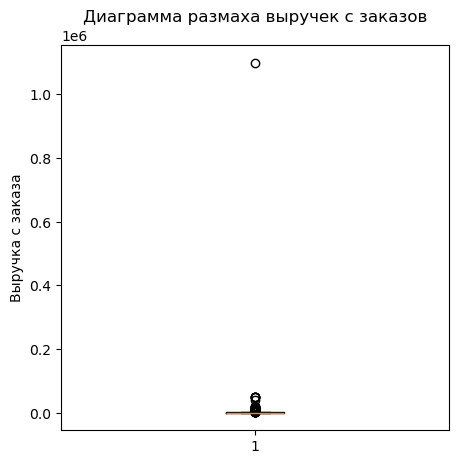

In [1124]:
plt.figure(figsize=(5, 5))
plt.boxplot(order_totals)
plt.title("Диаграмма размаха выручек с заказов")
plt.ylabel("Выручка с заказа")
plt.show()

Самая большая выручка с заказа у отсутствующего order id. Что бы было нормально видно ящик с усами уберем этот выброс.

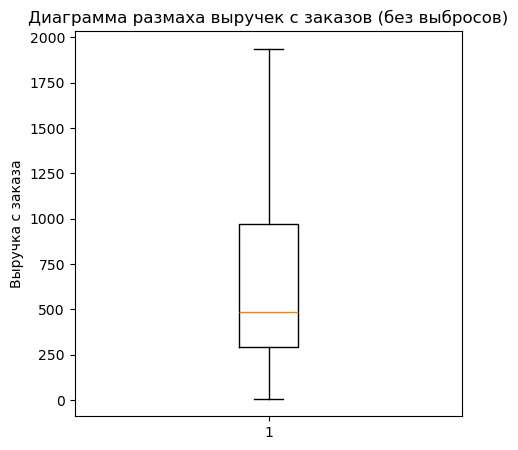

In [1125]:
# Вычисление IQR
Q1 = np.percentile(order_totals, 25)
Q3 = np.percentile(order_totals, 75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация данных (убираем выбросы)
filtered_order_totals = order_totals[(order_totals >= lower_bound) & (order_totals <= upper_bound)]

# Строим диаграмму размаха
plt.figure(figsize=(5, 5))
plt.boxplot(filtered_order_totals)
plt.title("Диаграмма размаха выручек с заказов (без выбросов)")
plt.ylabel("Выручка с заказа")
plt.show()


В основном пожертвования составляют от 300 до 1000 рублей. Но так же платижи достигают и 2000 рублей

<font color='black'><b> 3.2 Посмотрим зависимость customer от суммы заказа </b></font><br>

In [1126]:
data.sort_values(by="final_sum", ascending=False)[["customer", "final_sum"]].head(10)

,customer,final_sum
2355,humblehelptope****@gmail.com,"48,400.00"
2357,humblehelptope****@gmail.com,"48,400.00"
816,azat.khali****@gmail.com,"48,400.00"
993,n-sorokina@yandex.ru,"48,400.00"
2365,humblehelptope****@gmail.com,"48,400.00"
4093,avito****@hotmail.com,"38,720.00"
1248,gypsytatto****@gmail.com,"21,054.00"
3332,Bar-m****@yandex.ru,"19,360.00"
4022,bere****@bk.ru,"19,360.00"
3229,Bar-m****@yandex.ru,"19,360.00"


In [1127]:
customer_sums = data.groupby("customer")["final_sum"].sum().sort_values(ascending=False)

In [1128]:
customer_sums.head(10)

customer
humblehelptope****@gmail.com   145,200.00
Bar-m****@yandex.ru             77,440.00
n-sorokina@yandex.ru            49,368.00
azat.khali****@gmail.com        48,400.00
avito****@hotmail.com           38,720.00
jevge****@bk.ru                 33,880.00
ket****@mail.ru                 33,880.00
holo****@gmail.com              28,739.92
hel****@mail.ru                 25,168.00
art.ma****@gmail.com            23,716.00
Name: final_sum, dtype: float64

Мы видим, что пользователь humblehelptope****@gmail.com пожертвовал больше всего денег:145,200.00, на втором месте Bar-m****@yandex.ru, он пожертвовал 77,440.00 рублей, и на третем месте пользователь n-sorokina@yandex.ru с суммой 49,368.00.

Построим график ТОП 10 людей кто больше всего пожертвовал денег.

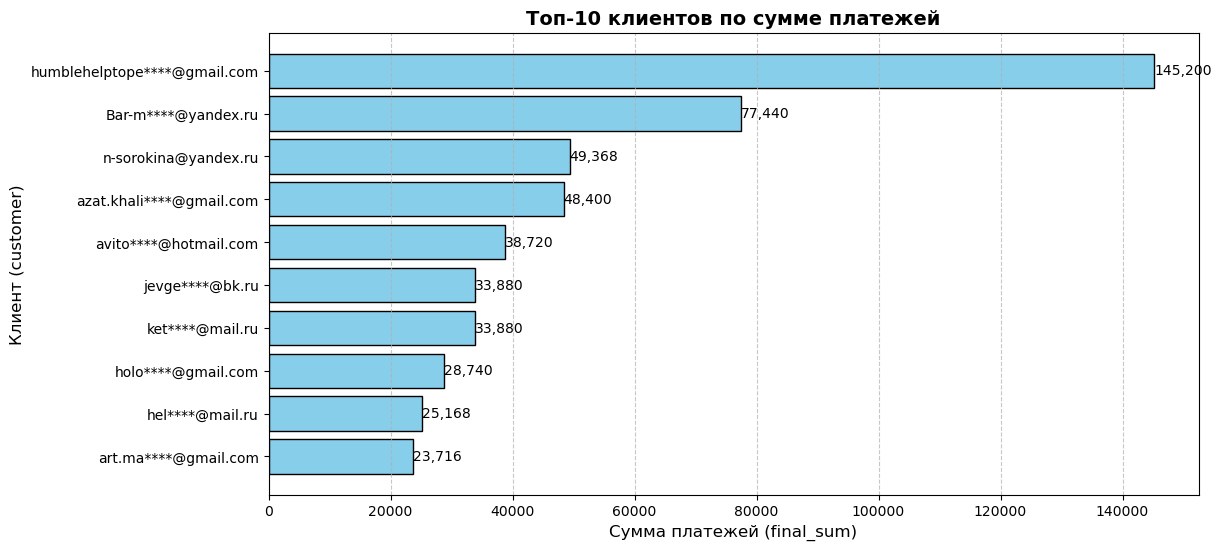

In [1129]:
# Группируем и сортируем данные
customer_sums = data.groupby("customer")["final_sum"].sum().sort_values(ascending=False).head(10)

# Создаём график
plt.figure(figsize=(12, 6))  # Увеличенный размер
bars = plt.barh(customer_sums.index, customer_sums.values, color="skyblue", edgecolor="black")

# Оформление
plt.xlabel("Сумма платежей (final_sum)", fontsize=12)
plt.ylabel("Клиент (customer)", fontsize=12)
plt.title("Топ-10 клиентов по сумме платежей", fontsize=14, fontweight="bold")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Инвертируем ось Y, чтобы самый крупный клиент был сверху
plt.gca().invert_yaxis()

# Добавляем значения на бары для лучшей читаемости
for bar in bars:
    plt.text(
        bar.get_width(),  # X-координата текста (чуть правее конца бара)
        bar.get_y() + bar.get_height() / 2,  # Y-координата (по центру бара)
        f"{bar.get_width():,.0f}",  # Значение, округлённое до целого
        va="center", ha="left", fontsize=10, color="black"
    )

# Добавляем сетку для улучшения восприятия
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Показываем график
plt.show()

Группируем по месяцам и делаем расчет выручки

In [1130]:
data['month'] = data['action_date'].dt.to_period('M')  # Добавляем столбец с месяцами
monthly_revenue = data.groupby('month')['final_sum'].sum()

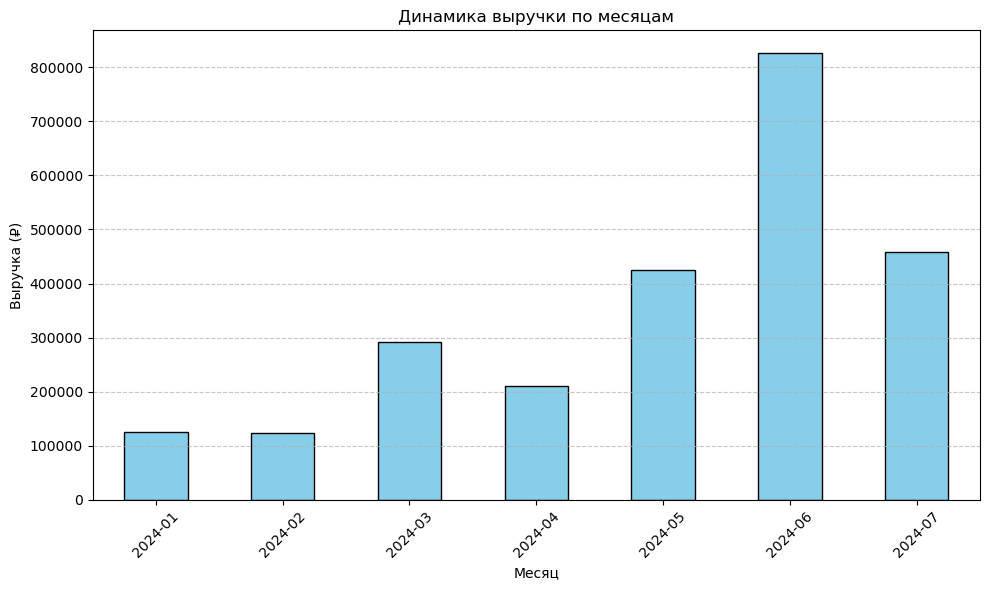

In [1131]:
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Динамика выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка (₽)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Посмотрим так же линейную диаграмму, что бы видить тренд пожертвований.

In [1132]:
fig = px.line(data.groupby('action_date')['final_sum'].sum().rolling(14).mean().reset_index(), x='action_date', y='final_sum')
fig.show()

Мы видим очень большой всплеск 19 марта 2024 года. Надо посмотреть на него повнимательнее.

In [1133]:
# Фильтруем только 19 марта 2024 года (убираем время)
data_march_19 = data[data['action_date'].dt.date == pd.to_datetime('2024-03-19').date()]

# Выводим первые 50 строк
data_march_19.head()


,unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file,month
2351,121,2101268705,2024-03-19 22:55:00,Тинькофф,prostieveschi.ru,-,Parm****@gmail.com,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls,2024-03
2353,123,2101258294,2024-03-19 22:19:00,Тинькофф,prostieveschi.ru,-,bullo****@list.ru,Регулярная оплата,300,RUB,9.60,290.40,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls,2024-03
2355,125,2101232539,2024-03-19 20:53:00,Тинькофф,prostieveschi.ru,"19,994.00",humblehelptope****@gmail.com,Оплата,50000,RUB,"1,600.00","48,400.00",RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls,2024-03
2357,127,2101229295,2024-03-19 20:42:00,Тинькофф,prostieveschi.ru,"19,993.00",humblehelptope****@gmail.com,Оплата с созданием подписки,50000,RUB,"1,600.00","48,400.00",RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls,2024-03
2358,128,2101194011,2024-03-19 18:43:00,Тинькофф,prostieveschi.ru,-,mariaivc****@mail.ru,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls,2024-03


Вывод: 19 марта было крупное пожертвование от humblehelptope****@gmail.com. Возможно было какое то мероприятие или какое то публичная деятельность или выделение средств от государства.

In [1134]:
# Фильтруем по customer
data_filtered = data[data['customer'] == 'humblehelptope****@gmail.com']

In [1135]:
data_filtered.head()

,unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file,month
2355,125,2101232539,2024-03-19 20:53:00,Тинькофф,prostieveschi.ru,"19,994.00",humblehelptope****@gmail.com,Оплата,50000,RUB,"1,600.00","48,400.00",RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls,2024-03
2357,127,2101229295,2024-03-19 20:42:00,Тинькофф,prostieveschi.ru,"19,993.00",humblehelptope****@gmail.com,Оплата с созданием подписки,50000,RUB,"1,600.00","48,400.00",RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls,2024-03
2365,135,2101066181,2024-03-19 11:20:00,Тинькофф,prostieveschi.ru,"19,985.00",humblehelptope****@gmail.com,Оплата,50000,RUB,"1,600.00","48,400.00",RUB,Завершена,"Поддержите ""Простые вещи""",3.20,март.xls,2024-03


Данный пользователь заплатил 150 000 рублей в один день, это не характерно для остальных пользователей. Считаю, что с данным человеком надо разбираться отдельно, и узнать причину, почему он вносил такую сумму. Если это простое пожертвование то надо узнать согласно какому мероприятию он это сделал, но если это какой то взнос например от государства, то учитывать его не надо, так как это будет искажать иследование остальных пользователей.

Вывод по Шагу №3: Мы посмотрели зависимости пожертвований от order id и эмейлу пользователей. Сделали график топ 10 пользователей по сумме пожертвований. Выявили одного абонента который заплатил 150 000 рублей в один день, 19го марта. Данный платеж необходимо уточнить у заказчика, является ли он запланированным.  Далее мы посмотрели выручки по месяцам, самым удачным по выручки месяцем стал июнь. Так же мы построили графики зависимости платежей от дня недели и времени суток. Больше всего пожертвований было по субботам. Так же начиная с 8 утра и до 2 дня совершается больше всего платежей. Теперь что бы понять какие рекомендации дать заказчику сделаем RFM анализ.

# Шаг 4. RFM анализ

<font color='black'><b> 4.1 Сегментация покупателей (RFM анализом) </b></font><br>

Суть RFM-анализа – разделять клиентов в зависимости от того, как давно они сделали покупку, как часто они ее делали и сколько денег потратили. Каждый признак мы можем разделить еще на 3 подгруппы. 

Для Recency это выглядит следующим образом: 

1 – клиенты, которые совершали покупки очень давно;

2 – относительно недавние клиенты;

3 – только пришедшие клиенты.

Frequency:

1 – клиент совершает очень мало покупок, обычно не превосходит единоразового визита;

2 – клиент приходит за покупками, но крайне редко;

3 – постоянный покупатель, который часто взаимодействует с продуктом.

Monetary:

1 – небольшая сумма покупки;

2 – средние затраты;

3 – крупная сумма, которую потратил клиент на товар или услугу компании.

Так как нам надо разделить на три группы, я решил, что лучше выбрать 33 и 67 процентили, так как это делит сегменты на равыне доли. Я думаю что так будет удобнее сравнивать.

In [1136]:
#извлекаем столбцы
temp=['customer', 'order_id', 'action_date', 'final_sum']
rfm_data=data[temp]
rfm_data.shape

(3326, 4)

In [1137]:
rfm_data.head(10)

,customer,order_id,action_date,final_sum
0,tigro****@gmail.com,-,2024-06-30 22:18:00,193.60
1,12ost****@mail.ru,-,2024-06-30 20:18:00,968.00
2,olk****@mail.ru,-,2024-06-30 20:06:00,484.00
5,iav****@icloud.com,"22,715.00",2024-06-30 16:17:00,484.00
6,kho****@yandex.ru,-,2024-06-30 15:56:00,484.00
7,natir****@gmail.com,-,2024-06-30 15:29:00,96.10
9,Andrey.esa****@gmail.com,-,2024-06-30 15:17:00,333.96
10,iriska****@yandex.ru,-,2024-06-30 15:15:00,96.10
11,nat****@gmail.com,-,2024-06-30 14:54:00,290.40
12,natalk****@inbox.ru,-,2024-06-30 14:45:00,677.60


In [1138]:
pd.options.mode.chained_assignment = None #убираем ошибку

NOW = dt.datetime(2024,8,31)
#Convert date to datetime format.
rfm_data['action_date'] = pd.to_datetime(rfm_data['action_date'])
# rfm Table
rfm_table=rfm_data.groupby('customer').agg({'action_date': lambda x: (NOW - x.max()).days, # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'final_sum': lambda x: x.sum() })   # Monetary 

rfm_table['action_date'] = rfm_table['action_date'].astype(int)
 
rfm_table.rename(columns={'action_date': 'recency', 
                         'order_id': 'frequency',
                         'final_sum': 'monetary_value'}, inplace=True)
rfm_table.head()

,recency,frequency,monetary_value
customer,,,
****@bk.ru,78,1,968.00
****@de.ru,57,1,968.00
****@eml.cc,32,2,"1,452.00"
****@gksnab.ru,115,1,"2,420.00"
****@gmail.com,76,1,96.10


In [1139]:
quantiles = rfm_table.quantile(q=[0.33,0.67])
quantiles

,recency,frequency,monetary_value
0.33,54.00,1.00,484.00
0.67,84.00,1.00,968.00


In [1140]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()

##  rfm Segmentation ----
rfm_Segment = rfm_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

In [1141]:
def R_Class(x, p, d):
    if x <= d[p][0.33]: 
        return 3
    elif x <= d[p][0.67]: 
        return 2
    else:
        return 1

def FM_Class(x, p, d):
    if x <= d[p][0.33]:  
        return 1
    elif x <= d[p][0.67]: 
        return 2
    else:
        return 3

In [1142]:
rfm_Segment['R_Quartile'] = rfm_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
rfm_Segment['F_Quartile'] = rfm_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
rfm_Segment['M_Quartile'] = rfm_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
rfm_Segment['rfm'] = rfm_Segment.R_Quartile.map(str) \
                            + rfm_Segment.F_Quartile.map(str) \
                            + rfm_Segment.M_Quartile.map(str)

Смотрим сколько всего комбинаций:

In [1143]:
rfm_Segment['rfm'].unique()

array(['212', '333', '113', '211', '332', '111', '313', '112', '213',
       '311', '331', '132', '232', '233', '133', '312', '131', '231'],
      dtype=object)

Теперь сделаем описание сигментирования пользователей:

<font color='black'><b> Ушедшие клиенты: </b></font><br>

In [1144]:
rfm_Segment[rfm_Segment['rfm'].isin(['111', '112', '113'])].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
customer,,,,,,,
marusyail.ilyus****@ya.ru,232,1,96.10,1,1,1,111
k_olga@i****.ru,231,1,968.00,1,1,2,112
aalpa****@list.ru,231,1,96.10,1,1,1,111
ludmilakuto****@gmail.com,228,1,290.40,1,1,1,111
abc****@mail.ru,227,1,96.10,1,1,1,111


Клиенты, которые приходят единоразово, совершают мало пожертвований и тратят на это как мало, так и много средств. Подобные клиенты, скорее всего, больше не вернутся к вам, поэтому не стоит тратить на них время. Для такого сегмента вы можете отправить реакционную рассылку.

In [1145]:
rfm_Segment[rfm_Segment['rfm'].isin(['121', '122', '123'])].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
customer,,,,,,,


Такие клиенты совершают несколько пожертвований в разный период времени с разным бюджетом. В данном случае можно постараться вернуть клиентов с помощью рассылки. Например, можно отправить опрос и узнать, почему клиенты больше не пользуются вашими услугами.

In [1146]:
rfm_Segment[rfm_Segment['rfm'].isin(['131', '132', '133'])].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
customer,,,,,,,
darya.zache****@mail.ru,165,2,464.64,1,3,1,131
humblehelptope****@gmail.com,164,3,"145,200.00",1,3,3,133
thisismashaor****@gmail.com,156,2,774.40,1,3,2,132
kliriko****@gmail.com,151,2,580.80,1,3,2,132
hel****@mail.ru,106,2,"25,168.00",1,3,3,133


Таким клиентам нравится ваш продукт и они готовы платить за него, но редко с ним взаимодействуют. Следует попытаться вернуть таких клиентов. Это можно сделать с помощью рассылки.

<font color='black'><b> Неактивные клиенты: </b></font><br>

In [1147]:
rfm_Segment[rfm_Segment['rfm'].isin(['211', '212', '213','221','222','223'])].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
customer,,,,,,,
Ekaalivanova@gmail.com,84,1,193.60,2,1,1,211
Oliym@mail.ru,84,1,96.10,2,1,1,211
lapshinova2@yandex.ru,84,1,968.00,2,1,2,212
nasta260500@gmail.com,84,1,96.10,2,1,1,211
saabway@mail.ru,84,1,968.00,2,1,2,212


Это относительно недавние клиенты, которые приходят единоразово и могут потратить разные суммы. Такие клиенты были у вас недавно, поэтому еще помнят вас и, возможно, еще будут совершать пожертвования. Поэтому следует им напомнить о себе, например, сделать это можно с помощью рассылки, где будет указана информация о мероприятиях, акциях и так далее.

In [1148]:
rfm_Segment[rfm_Segment['rfm'].isin(['231', '232', '233'])].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
customer,,,,,,,
kati20002@yandex.ru,83,2,288.10,2,3,1,231
volga34****@yandex.ru,81,2,"1,645.60",2,3,3,233
olesyamur****@gmail.com,81,2,"2,904.00",2,3,3,233
ipse.f****@gmail.com,81,4,"5,082.00",2,3,3,233
blackberryk****@gmail.com,80,2,578.00,2,3,2,232


Такие клиенты были у вас недавно и покупали довольно часто, но в один момент перестали с вами взаимодействовать. Следует обязательно выяснить, что случилось, почему клиент перестал вносить пожертвования. Вернуть таких клиентов можно с помощью опроса.

<font color='black'><b> Постоянные клиенты: </b></font><br>

In [1149]:
rfm_Segment[rfm_Segment['rfm'].isin(['311', '312', '313'])].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
customer,,,,,,,
Kanokaya****@ya.ru,54,1,242.00,3,1,1,311
Ekaaliva****@gmail.com,54,1,193.60,3,1,1,311
tavi****@mail.ru,54,1,576.60,3,1,2,312
O****@mail.ru,54,1,96.10,3,1,1,311
svinopt****@gmail.com,54,1,"1,936.00",3,1,3,313


Это совсем новые клиенты, которые недавно узнали о вас и готовы регулярно жертвовать небольшую или крупную сумму. Из этого сегмента можно выделить потенциальных VIP-клиентов. Следует отправить приветственное письмо и привить интерес к продукту.

In [1150]:
rfm_Segment[rfm_Segment['rfm'].isin(['321', '322', '323'])].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
customer,,,,,,,


Таких клиентов можно считать постоянными. Они готовы жертвовать на ваш продукт за разную стоимость.  Для них лучше отправлять простые рассылки, чтобы «не спугнуть».

In [1151]:
rfm_Segment[rfm_Segment['rfm'].isin(['331', '332', '333'])].sort_values('recency', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
customer,,,,,,,
elsa****@gmail.com,54,2,"1,452.00",3,3,3,333
moon****@gmail.com,52,2,"1,936.00",3,3,3,333
Schapok****@gmail.com,52,2,968.00,3,3,2,332
lenyu****@gmail.com,52,2,677.60,3,3,2,332
daria.****@gmail.com,52,2,192.20,3,3,1,331


Постоянный клиент, который готов регулярно делать пожертвования.VIP-клиенту следует отправлять особые предложения, например, это может быть программа лояльности либо приглашение в VIP-клуб.

<font color='black'><b> 4.2 Проанализировать сегменты (количество покупателей, средний чек, основные продукты и категории) </b></font><br>

Добавим сегмент группы в основную таблицу

In [1152]:
rfm_Segment = rfm_Segment.reset_index()

In [1153]:
rfm_Segment.head()

,customer,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,rfm
0,****@bk.ru,78,1,968.00,2,1,2,212
1,****@de.ru,57,1,968.00,2,1,2,212
2,****@eml.cc,32,2,"1,452.00",3,3,3,333
3,****@gksnab.ru,115,1,"2,420.00",1,1,3,113
4,****@gmail.com,76,1,96.10,2,1,1,211


In [1154]:
data.head()

,unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file,month
0,0,2122072170,2024-06-30 22:18:00,Тинькофф,prostieveschi.ru,-,tigro****@gmail.com,Регулярная оплата,200,RUB,6.40,193.60,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06
1,1,2122055914,2024-06-30 20:18:00,Тинькофф,prostieveschi.ru,-,12ost****@mail.ru,Регулярная оплата,1000,RUB,32.00,968.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06
2,2,2122054093,2024-06-30 20:06:00,Тинькофф,prostieveschi.ru,-,olk****@mail.ru,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06
5,5,2122017551,2024-06-30 16:17:00,Тинькофф,prostieveschi.ru,"22,715.00",iav****@icloud.com,Оплата с созданием подписки,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06
6,6,2122014201,2024-06-30 15:56:00,Тинькофф,prostieveschi.ru,-,kho****@yandex.ru,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06


In [1155]:
data = data.merge(rfm_Segment[['customer', 'rfm']], on='customer', how='left')

Теперь разобьем их на три категории

In [1156]:
list_klient = {
    
    'Ушедшие клиенты':['111', '112', '113','121', '122', '123','131', '132', '133'],
    
    'Неактивные клиенты':['211', '212', '213','221','222','223','231', '232', '233'],
    
    'Постоянные клиенты':['311', '312', '313','321', '322', '323','331', '332', '333']
}

In [1157]:
def categor_klient(rfm):

    for klient, items_klient in list_klient.items():
        for item in items_klient:
            if item in rfm:
                return klient
    return klient

In [1158]:
data['categor_klient'] = data['rfm'].apply(categor_klient)

In [1159]:
data.head()

,unnamed: 0,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,file,month,rfm,categor_klient
0,0,2122072170,2024-06-30 22:18:00,Тинькофф,prostieveschi.ru,-,tigro****@gmail.com,Регулярная оплата,200,RUB,6.40,193.60,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06,313,Постоянные клиенты
1,1,2122055914,2024-06-30 20:18:00,Тинькофф,prostieveschi.ru,-,12ost****@mail.ru,Регулярная оплата,1000,RUB,32.00,968.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06,313,Постоянные клиенты
2,2,2122054093,2024-06-30 20:06:00,Тинькофф,prostieveschi.ru,-,olk****@mail.ru,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06,333,Постоянные клиенты
3,5,2122017551,2024-06-30 16:17:00,Тинькофф,prostieveschi.ru,"22,715.00",iav****@icloud.com,Оплата с созданием подписки,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06,332,Постоянные клиенты
4,6,2122014201,2024-06-30 15:56:00,Тинькофф,prostieveschi.ru,-,kho****@yandex.ru,Регулярная оплата,500,RUB,16.00,484.00,RUB,Завершена,"Поддержите ""Простые вещи""",3.20,июнь.xls,2024-06,333,Постоянные клиенты


Количество покупателей в каждом сегменте:

In [1160]:
kol_pok = data.groupby('categor_klient')['customer'].nunique()

In [1161]:
print(kol_pok)

categor_klient
Неактивные клиенты    502
Постоянные клиенты    496
Ушедшие клиенты       478
Name: customer, dtype: int64


Средний чек в каждом сегменте:

In [1162]:
sr_chek_seg = data.groupby('categor_klient')['final_sum'].mean().round(2)

In [1163]:
print(sr_chek_seg)

categor_klient
Неактивные клиенты     791.40
Постоянные клиенты     568.40
Ушедшие клиенты      1,230.61
Name: final_sum, dtype: float64


Построим графики показывающие Recency, Frequency, Monetary.

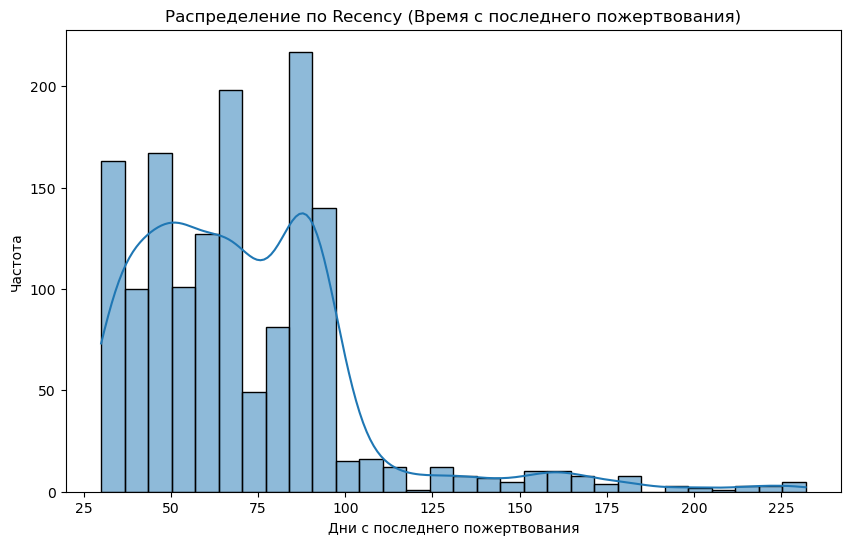

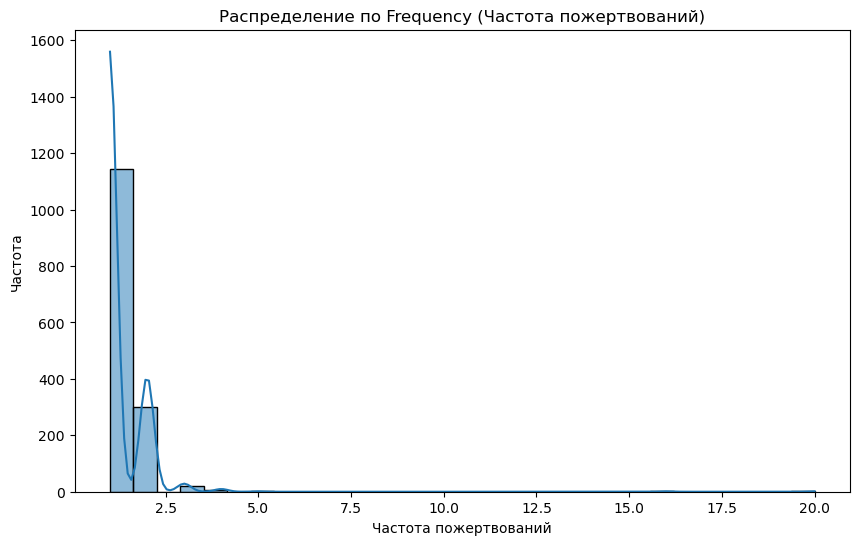

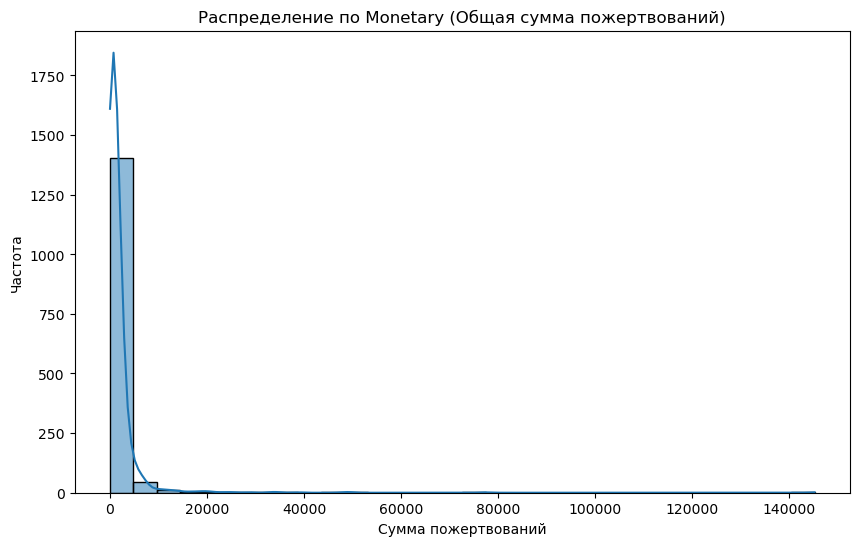

In [1164]:
# Гистограмма для Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_Segment['recency'], bins=30, kde=True)
plt.title('Распределение по Recency (Время с последнего пожертвования)')
plt.xlabel('Дни с последнего пожертвования')
plt.ylabel('Частота')
plt.show()

# Гистограмма для Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_Segment['frequency'], bins=30, kde=True)
plt.title('Распределение по Frequency (Частота пожертвований)')
plt.xlabel('Частота пожертвований')
plt.ylabel('Частота')
plt.show()

# Гистограмма для Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm_Segment['monetary_value'], bins=30, kde=True)
plt.title('Распределение по Monetary (Общая сумма пожертвований)')
plt.xlabel('Сумма пожертвований')
plt.ylabel('Частота')
plt.show()


Посмотрим сколько всего денег принесла каждая категория клиентов:

In [1165]:
result = data.groupby("categor_klient")["final_sum"].sum().reset_index()

In [1166]:
result = result.sort_values(by="final_sum", ascending=False)

In [1167]:
pd.set_option("display.float_format", "{:,.2f}".format)  # Для красивого отображения чисел
print(result)

       categor_klient    final_sum
1  Постоянные клиенты 1,098,158.39
2     Ушедшие клиенты   719,907.47
0  Неактивные клиенты   640,245.84


Наибольшую часть пожертвований приносят следующие группы:

Постоянные клиенты: 1,098,158.39 руб.
Ушедшие клиенты:   719,907.47 руб.
Неактивные клиенты:   640,245.84 руб.

Вывод по шагу №4: В шаге номер 4 мы сегментировали пользователей на три группы: 'Ушедшие клиенты', 'Неактивные клиенты', 'Постоянные клиенты'. для каждой группы мы описали краткую характеристику клиенту, и дали рекомендации как привлеч данного клиента. После разделения на три группы мы сделали анализ данных групп и посмотрели некоторые метрики. Количество покупателей в каждой группе: 
Неактивные клиенты    502
Постоянные клиенты    496
Ушедшие клиенты       478 
Средний чек по группам: 
Неактивные клиенты     791.40 руб.
Постоянные клиенты     568.40 руб.
Ушедшие клиенты       1230.61 руб.
Наибольшую часть пожертвований приносят следующие группы:
Постоянные клиенты: 1,098,158.39 руб. 
Ушедшие клиенты: 719,907.47 руб. 
Неактивные клиенты: 640,245.84 руб.

# Шаг 5. Когортный анализ

Период когорты – месяц
Горизонт анализа – данных немного, поэтому делаем за весь период.
Обязательно построить когорты по оттоку, среднему чеку и жизненной ценности, графики и прочие показатели – по вашему желанию.

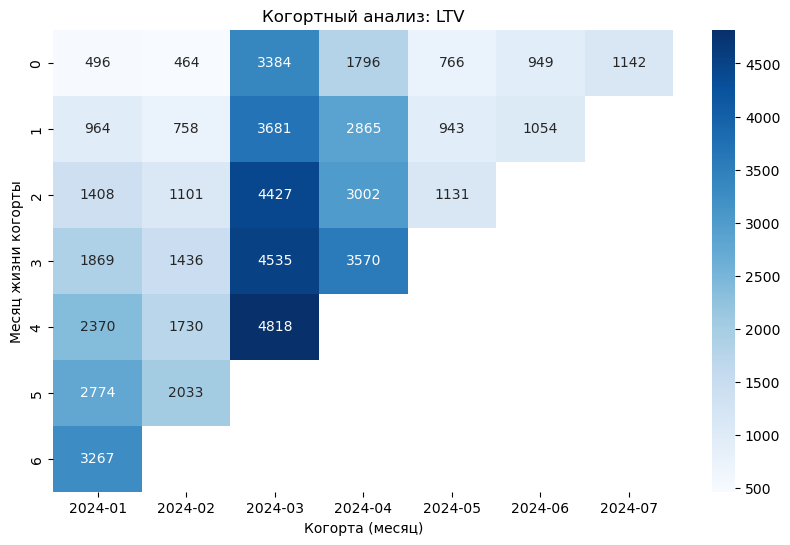

In [1168]:
# 1. Определение когорт
data['cohort_month'] = data.groupby('customer')['action_date'].transform('min').dt.to_period('M')
data['month_transaction'] = data['action_date'].dt.to_period('M')

# 2. Цикл для обработки всех когорт
cohort_tables = []
for cohort in data['cohort_month'].unique():
    cohort_df = data[data['cohort_month'] == cohort].copy()
    cohort_data = (cohort_df.groupby(['cohort_month', 'month_transaction'])
                   .agg(
                       users=('customer', 'nunique'),
                       revenue=('final_sum', 'sum'),
                       transactions=('customer', 'count')
                   )
                   .reset_index())
    
    cohort_data['lifetime'] = (cohort_data['month_transaction'].astype('int64') - cohort_data['cohort_month'].astype('int64'))

    
    # Retention Rate и Churn Rate
    initial_users = cohort_data.groupby('cohort_month')['users'].transform('first')
    cohort_data['Retention_Rate'] = cohort_data['users'] / initial_users
    cohort_data['Churn_Rate'] = 1 - cohort_data['Retention_Rate']
    
    # LTV
    cohort_data['LTV'] = cohort_data.groupby('cohort_month')['revenue'].cumsum() / cohort_data.groupby('cohort_month')['users'].transform('first')
    
    # Средний чек
    cohort_data['Average_Check'] = cohort_data['revenue'] / cohort_data['transactions']
    
    cohort_tables.append(cohort_data)

# 3. Объединяем все когорты в одну таблицу
cohort_final = pd.concat(cohort_tables, ignore_index=True)

# 4. Создаем сводную таблицу (pivot)
pivot_table = cohort_final.pivot(index='lifetime', columns='cohort_month', values='LTV')

# 5. Визуализация с помощью heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues')
plt.title('Когортный анализ: LTV')
plt.xlabel('Когорта (месяц)')
plt.ylabel('Месяц жизни когорты')
plt.show()


**Выводы по когортному анализу**

1. Динамика LTV по когортам

LTV (Lifetime Value) постепенно увеличивается с увеличением месяца жизни когорты, что ожидаемо, так как пользователи совершают дополнительные покупки.
Однако темпы роста LTV различаются между когортах. Это может свидетельствовать о различной лояльности пользователей в разные месяцы.

2. Retention Rate и Churn Rate

В первые месяцы Retention Rate значительно выше, но затем заметно снижается, что указывает на отток пользователей.
Средний Retention Rate на 3-4 месяце жизни когорты падает, что говорит о необходимости усиления маркетинговых и удерживающих стратегий.
Churn Rate (коэффициент оттока) растет по мере старения когорты, особенно после 2-3 месяцев, что может быть сигналом для улучшения клиентского опыта.

3. Различие между когортами

Когорты из разных месяцев показывают разные LTV, что может говорить о сезонных факторах или эффективности маркетинговых кампаний.
Например, когорта, стартовавшая в начале года, имеет более высокие показатели LTV на поздних этапах, что может быть связано с новогодними акциями и повышенной активностью пользователей.
4. Средний чек (Average Check)

Средний чек достаточно стабилен между когортами, но может варьироваться по месяцам.
Более высокие значения среднего чека в некоторых когортных месяцах могут свидетельствовать о продажах более дорогих товаров или успешных апселлах.

**Рекомендации**

✅ Удержание пользователей: необходимо внедрять механизмы удержания после 1-2 месяцев, так как на этом этапе наблюдается наибольший отток.
✅ Маркетинговая оптимизация: стоит анализировать, какие маркетинговые активности привлекают наиболее ценных пользователей (с высоким LTV).
✅ Анализ эффективности продаж: необходимо изучить факторы, влияющие на средний чек, и оценить, можно ли увеличить его за счет дополнительных продаж или кросс-продаж.
✅ Работа с разными когортами: изучить, почему одни когорты демонстрируют более высокий Retention Rate и LTV, а другие теряют пользователей быстрее.

Вывод:  Улучшение Retention Rate и Churn Rate в первые месяцы жизни когорты может существенно повысить LTV и общую прибыльность бизнеса.

# Шаг 6. Маркетинговый анализ

Пользовательское поведение
Маркетинговые показатели: *- DAU, MAU, WAU, sticky + динамика + скользящее среднее
Дополнительно: *- конверсия по всем каналам *- конверсия поканально *- динамика количества доноров *- динамика проблем с платежами (статус fail) *- динамика чеков

In [1169]:
# Рассчитаем DAU, WAU, MAU, Sticky Factor
data['date'] = data['action_date'].dt.date

DAU = data.groupby('date')['customer'].nunique()
WAU = data.groupby(pd.Grouper(key='action_date', freq='W'))['customer'].nunique()
MAU = data.groupby(pd.Grouper(key='action_date', freq='ME'))['customer'].nunique()

DAU.index = pd.to_datetime(DAU.index)  # Преобразуем в DatetimeIndex

Sticky_Factor = (DAU.resample('ME').mean() / MAU).dropna()


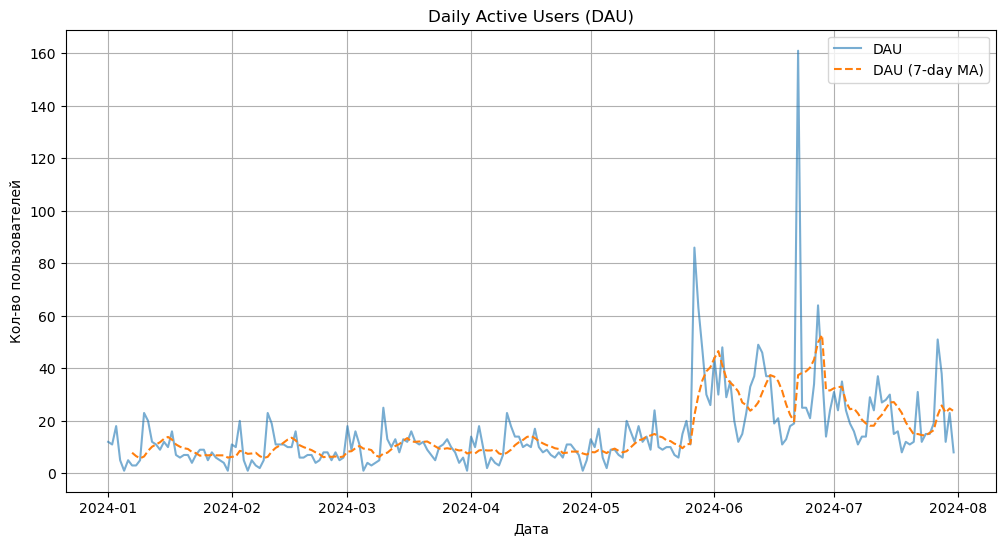

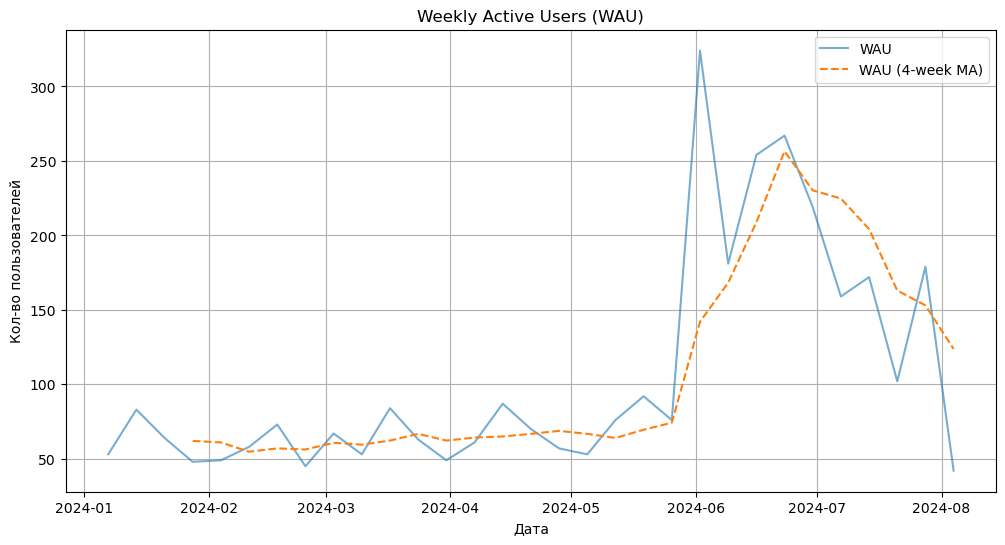

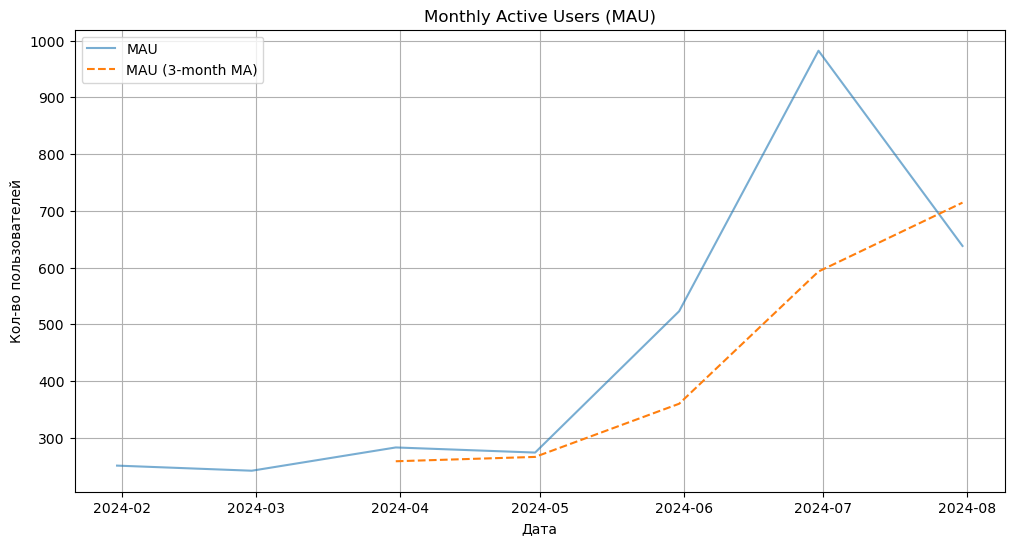

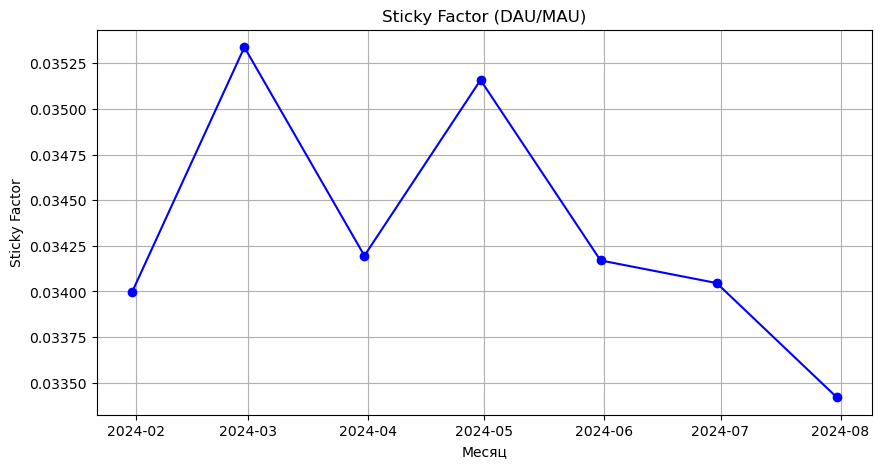

In [1170]:
# Динамика и скользящее среднее
DAU_rolling = DAU.rolling(7).mean()
WAU_rolling = WAU.rolling(4).mean()
MAU_rolling = MAU.rolling(3).mean()

# 7. Визуализация DAU, WAU, MAU
plt.figure(figsize=(12, 6))
plt.plot(DAU, label='DAU', alpha=0.6)
plt.plot(DAU_rolling, label='DAU (7-day MA)', linestyle='--')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Дата')
plt.ylabel('Кол-во пользователей')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(WAU, label='WAU', alpha=0.6)
plt.plot(WAU_rolling, label='WAU (4-week MA)', linestyle='--')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Дата')
plt.ylabel('Кол-во пользователей')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(MAU, label='MAU', alpha=0.6)
plt.plot(MAU_rolling, label='MAU (3-month MA)', linestyle='--')
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Дата')
plt.ylabel('Кол-во пользователей')
plt.legend()
plt.grid()
plt.show()

# 8. Визуализация Sticky Factor
plt.figure(figsize=(10, 5))
plt.plot(Sticky_Factor, marker='o', linestyle='-', color='b')
plt.title('Sticky Factor (DAU/MAU)')
plt.xlabel('Месяц')
plt.ylabel('Sticky Factor')
plt.grid()
plt.show()

# Общий вывод:

Мы провели предобработку данных:
1.	Заполнили почти все пропуски в столбце **action_date**, за счет информации из других столбцов с датами.
2.	Оценили пропуски в **order_id** и заполнили маркерными значениями
3.	Исключили из анализируемого датафрейма пропуски в столбцах **comission_sum, final_sum и final_curerncy**
4.	Исключили 1 строку с пропуском в поле клиент
5.	Оценили пропуски по столбцу **city**, их оставили
6.	Привели к общему типу значения в поле **status** (отклонена, завершена)
7.	Проверили данные на наличие дубликатов, обнаружили что есть успешные оплаты, проходившие в один день у одного и того же клиента на одинаковую сумму, но это вероятнее всего не дубликаты.  В одном случае возможно клиент проводил отдельными переводами несколько платежей, в другом случае клиент судя по всему оформил три ежемесячные подписки. В случае с отмененными платежами, дубликаты скорей всего связаны с повторными попытками списаний, которые происходят в течение 3х дней. Их мы исключили, также мы исключили транзакции которые в этот же день в итоге завершились успешным списанием.

По результатам RFM анализа у нас получилось 5 сегментов клиентов
1.	**лояльные** - это клиенты, делавшие пожертвования недавно, до 31 день назад, 1-2 перевода в месяц, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 16 дней, средняя частота перечислений месяц 1.4, количество клиентов в этом сегменте 584. Средний чек 470 руб, общая сумма 729 562 р.
2.	**VIP клиенты** - это клиенты, делавшие пожертвования недавно, до 31 день назад, 1-2 перевода в месяц, суммарных переводов от 5000 руб. до 145 200 руб. У этого сегмента в среднем со дня перечисления прошло около 15 дней, средняя частота перечислений месяц 1.2, количество клиентов в этом сегменте 54. Средний чек почти 2900 руб., общая сумма 638 600 р.
3.	**спящие** - это клиенты, делавшие пожертвования относительно давно, 32-91 день назад, 1-2 перевода в месяц, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 53 дней, средняя частота перечислений в месяц 1, количество клиентов в этом сегменте 748. Средний чек 963 руб, общая сумма 851 462 р.
4.	**ушедшие** - это клиенты, делавшие пожертвования давно, более 91 дней назад, суммарных переводов до 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 135 дней, средняя частота перечислений в месяц 1, количество клиентов в этом сегменте 89. Средний чек 867 руб, общая сумма 93 486 р.
5.	**VIP (ушедшие)** - это клиенты, делавшие пожертвования давно, более 91 дней назад, суммарных переводов более 5000 руб. У этого сегмента в среднем со дня перечисления прошло около 135 дней, средняя частота перечислений в месяц 3, количество клиентов в этом сегменте 1. Средний чек 48 400 руб, общая сумма 145 200р.


Можно отметить, что в июне был всплеск по суммарным пожертвованиям, но это были клиенты из сегменты спящие, и поэтому в июле этих платежей мы уже не наблюдаем.

Также можно отметить что к июлю вырос средний чек у сегмента VIP и до июня рос средний чек у сегмента спящие. Средний чек лояльных клиентов почти не вырос. Здесь можно рекомендовать мотивировать клиентов из сегмента лояльные покупать продукцию фонда, для получения дополнительного финансирования из этого сегмента.
Также важная задача переводить спящих клиентов в лояльных

По результатам коготного анализа можно отметить следующее:

**Самые многочисленные когорты – когорты января, мая и июня.**

**Январская когорта** показывает наивысший уровень удержания клиентов, вероятнее всего это постоянные клиенты, отчислявшие деньги и ранее.  Начиная с марта коэффициент удержания сильно падает. **С февраля по апрель** наименьший размер когорт.

**В мае и июне** пришло много новых клиентов и у них достаточно высокая средняя сумма месячных пожертвований на старте в сравнении с январем и февралем.
**За счет своей многочисленности июньская когорта** принесла **наивысшую выручку в первый месяц** и за два месяца она дает суммарную выручку на уровне 6 месяцев 1й когорты.
Мартовская когорта при ясвоей малочисленности дает высокий LTV, это связано с большим платежом от клиента humblehelptope****@gmail.com на сумму 145 200 руб.
Майская когорта вторая по численности и по прибыльности на старте.

# Аналитическая панель

Приложение в streamlit: https://prostveshi-kj9odwvui92rfkih7qmikg.streamlit.app/